Importing libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


Data collection and processing

In [3]:
gold_data=pd.read_csv("gld_price_data.csv")
print(gold_data.head())

       Date          SPX        GLD        USO     SLV   EUR/USD
0  1/2/2008  1447.160034  84.860001  78.470001  15.180  1.471692
1  1/3/2008  1447.160034  85.570000  78.370003  15.285  1.474491
2  1/4/2008  1411.630005  85.129997  77.309998  15.167  1.475492
3  1/7/2008  1416.180054  84.769997  75.500000  15.053  1.468299
4  1/8/2008  1390.189941  86.779999  76.059998  15.590  1.557099


Gathering Info about data set

In [4]:
gold_data.info()
gold_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

data stats

In [5]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Corelation between data

In [11]:
correlation=gold_data.corr(numeric_only=True)

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


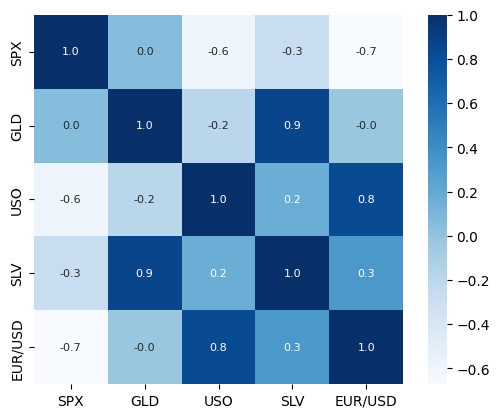

In [16]:
plt.Figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True,annot_kws={'size':8},cmap="Blues")
print(correlation['GLD'])

Check Distribution

C:\Users\apurv\AppData\Local\Temp\ipykernel_3640\3145034372.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data["GLD"])


<Axes: xlabel='GLD', ylabel='Density'>

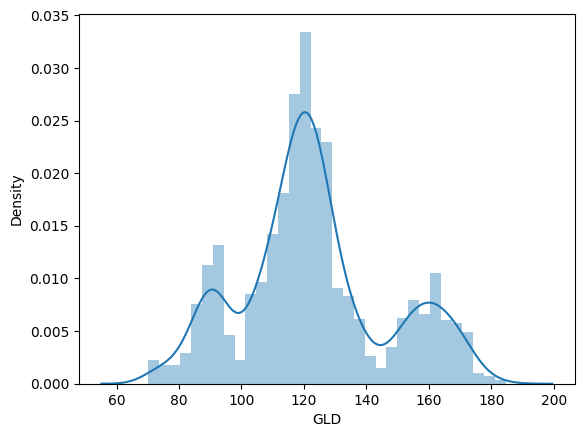

In [21]:
sns.distplot(gold_data["GLD"])

Filtering Data

In [24]:
x=gold_data.drop(["Date","GLD"],axis=1)
y=gold_data["GLD"]

Splitting data

In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Model Training

In [28]:
regr=RandomForestRegressor(n_estimators=100)
regr.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [29]:
pred=regr.predict(X_test)
print(pred)

[122.52793726 130.30110258 127.74659982  96.59749728 118.83560046
 114.44689956 124.7906014  117.81959965 107.94530098  98.22889965
  95.81509962 168.05069857 149.57250126 116.45500017 170.7361022
  85.33929971 122.966499   108.61729717 113.14500082 131.54850364
 124.26719896 113.71500068 116.06900025 108.7772997  108.53800125
 125.78869919 120.25799949 112.36039908 113.44010143 125.88139905
 146.19980137  89.59659983 167.9415996  113.66789946 108.31820108
 120.29080093 141.59959871 161.24590141 173.77519767 153.27640073
 119.19910115 113.34800048 121.31759935 113.5538996  121.99530034
 108.00000097  88.42959894 114.35029914 129.85890213 118.01550088
 103.82480012 129.90240226 106.95159815 160.68760379 131.5384005
 117.96609972 146.64310054 135.57810164  95.31100137 124.76180152
 115.43579855  86.04910044 104.29049915 113.72800046  84.16029908
 122.2491004  116.43229894 113.63340192 165.43250359  92.18550043
  80.09900072 160.96250066 159.17150218 106.90919997 150.31710099
 109.2396979

Test score

In [31]:
error_score=metrics.r2_score(Y_test,pred)
print(error_score)

0.9893851694117582


Error in graph

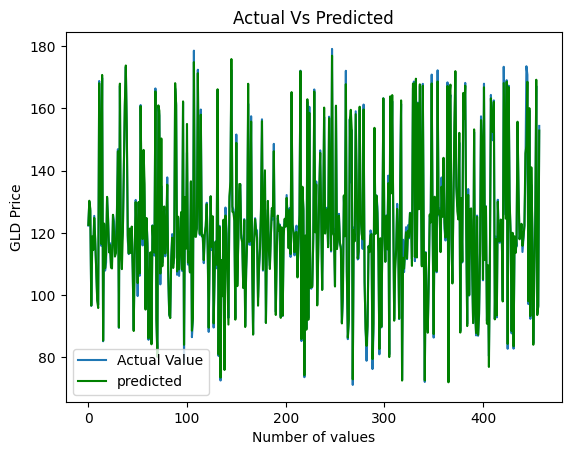

In [38]:
Y_test=list(Y_test)
plt.plot(Y_test,label="Actual Value")
plt.plot(pred,color="green",label="predicted")
plt.title("Actual Vs Predicted")
plt.xlabel("Number of values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()